In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# data set import
df = pd.read_excel("data/data_flash.xlsx", skiprows=[1])
# take only the features of the data set
X = df.iloc[:, :-1]

In [3]:
df.describe()

,Pressure,Liquid flow,Temperature,Vapor flow,Mole fraction ethanol in vapor
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.501223,60.005027,401.525140,19.972336,0.615892
std,2.607997,11.615314,19.983666,11.704624,0.013549
min,1.084085,40.016087,353.714405,-0.110367,0.587500
25%,3.298718,50.201409,386.967753,10.000121,0.606410
50%,5.498753,59.959207,404.947014,20.119785,0.617200
75%,7.742102,69.986606,418.113717,30.278517,0.625522
max,9.925913,79.876256,432.434602,40.787753,0.642213


In [4]:
from sklearn.preprocessing import StandardScaler

# create scaler object
scaler = StandardScaler()
# fit the scaler and transform the features
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.decomposition import PCA

# create the PCA object
pca = PCA()
# fit the PCA based on the data and transfrom the scaled feature data
X_pca = pca.fit_transform(X_scaled)
# extract the explained variance ratio (sum of all variances is 1)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance: {explained_variance}")

Explained variance: [0.53228549 0.46071408 0.00612362 0.00087681]


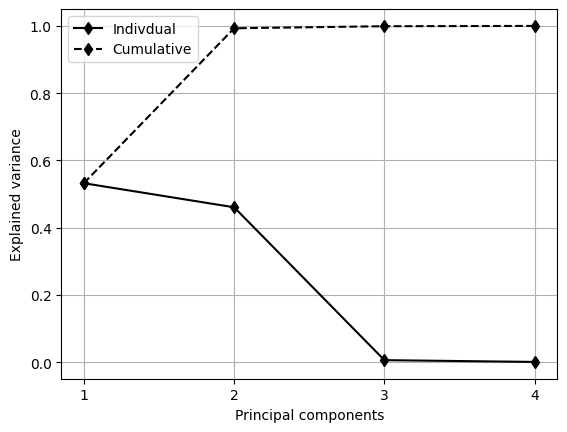

In [6]:
# plot the explained variance over the PCs
plt.plot(
    range(1, len(explained_variance) + 1), explained_variance, "-kd", label="Indivdual"
)
# plot the cumulative explained variance over the PCs
plt.plot(
    range(1, len(explained_variance) + 1),
    np.cumsum(explained_variance),
    "--kd",
    label="Cumulative",
)

plt.legend()
plt.xlabel("Principal components")
plt.ylabel("Explained variance")
plt.xticks(range(1, len(explained_variance) + 1))
# plt.yscale("log")
plt.grid()

Text(0, 0.5, 'PC 2 (46.07%)')

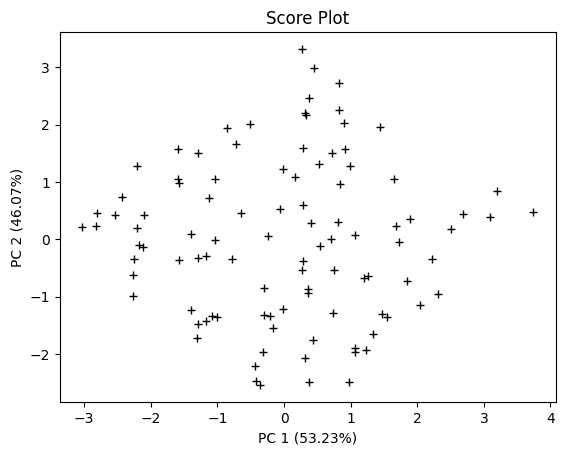

In [7]:
PCs = (0, 1)

# plot the transformed feature data in a 2D feature space
plt.plot(X_pca[:, PCs[0]], X_pca[:, PCs[1]], "+k")
plt.title("Score Plot")
plt.xlabel(f"PC {PCs[0]+1} ({explained_variance[PCs[0]]:.2%})")
plt.ylabel(f"PC {PCs[1]+1} ({explained_variance[PCs[1]]:.2%})")

Text(0.5, 1.02, 'Scoreplots')

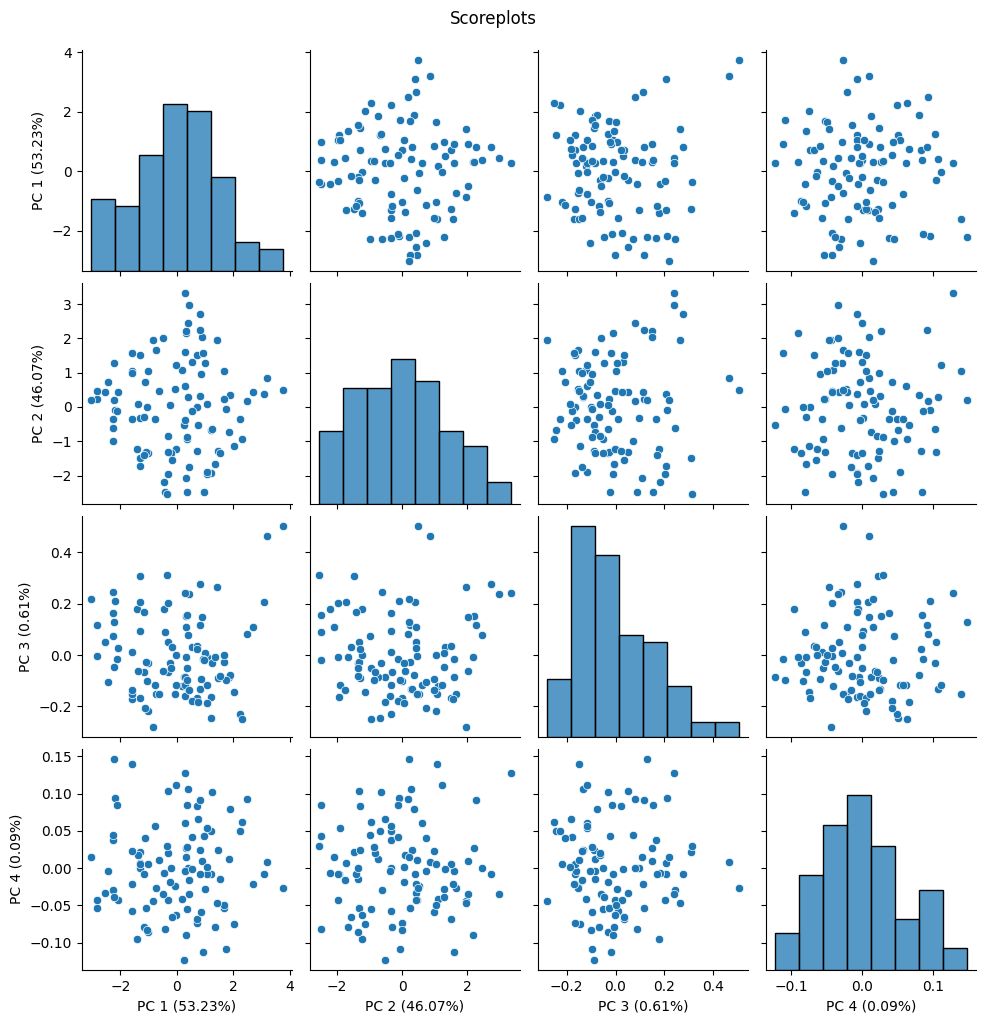

In [8]:
# create the column names for transformed data
column_names = [
    f"PC {i+1} ({explained_variance[i]:.2%})" for i in range(len(explained_variance))
]
# plot the transformed feature data in a 2D feature space
df_pca = pd.DataFrame(X_pca, columns=column_names)
g = sb.pairplot(df_pca)
g.figure.suptitle("Scoreplots", y=1.02)

### Testing capability of PCA for feature reduction

In [ ]:
y = df.iloc[:, -1]

In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [27]:
from sklearn.linear_model import LinearRegression
# create the linear regression model
model = LinearRegression()
# fit the model using the original data
model.fit(X_train, y_train)

LinearRegression()

Text(0.5, 1.0, 'R2 score using original features: Train: 0.988, Test: 0.985')

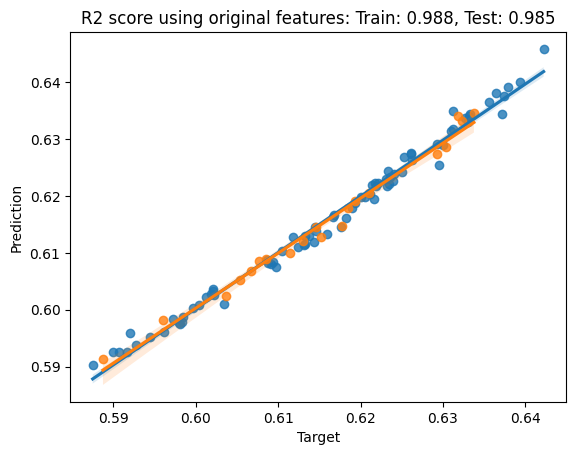

In [ ]:
from sklearn.metrics import r2_score

# Parity plot and relevant metrict for target
y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

sb.regplot(x=y_train, y=y_pred_train)
sb.regplot(x=y_test, y=y_pred_test)
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.title(f"R2 score using original features: Train: {r2_train:.3f}, Test: {r2_test:.3f}")

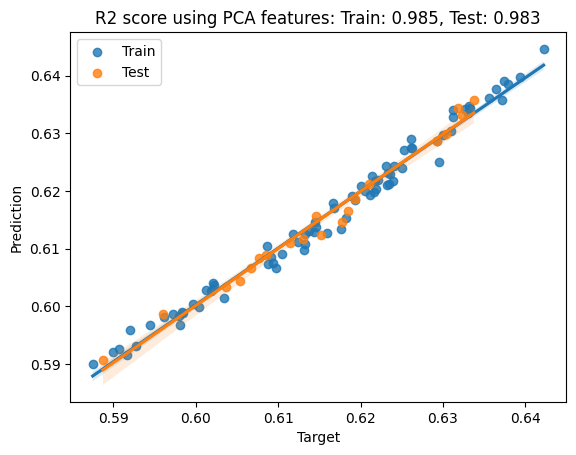

In [ ]:
# Train-test split for PCA features
X_pca_train, X_pca_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# Create the linear regression model for PCA features
model_pca = LinearRegression()
model_pca.fit(X_pca_train, y_train)

# Predictions and R2 scores for PCA features
y_pred_pca_train = model_pca.predict(X_pca_train)
r2_pca_train = r2_score(y_train, y_pred_pca_train)
y_pred_pca_test = model_pca.predict(X_pca_test)
r2_pca_test = r2_score(y_test, y_pred_pca_test)

# Parity plot for PCA features
sb.regplot(x=y_train, y=y_pred_pca_train, label="Train")
sb.regplot(x=y_test, y=y_pred_pca_test, label="Test")
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.title(
    f"R2 score using PCA features: Train: {r2_pca_train:.3f}, Test: {r2_pca_test:.3f}"
)
plt.legend()

### Generation of a loadings plot

In [36]:
# get the eigentvectors of all PCs (rows) for all features (columns) 
pca.components_.T

array([[-0.4826191 , -0.51661858],
       [ 0.51375148, -0.48655235],
       [-0.4806347 , -0.51874797],
       [-0.52165938,  0.47673116]])

In [33]:
# get the total explained variance
pca.explained_variance_

array([2.15064845, 1.86147102])

In [34]:
# calculate the loading points
loading_points = pca.components_.T * np.sqrt(pca.explained_variance_)
print(loading_points)

[[-0.70776521 -0.70485237]
 [ 0.75342114 -0.66383128]
 [-0.70485508 -0.70775761]
 [-0.76501814  0.65043167]]


Text(0, 0.5, 'PC 2 (46.07)%')

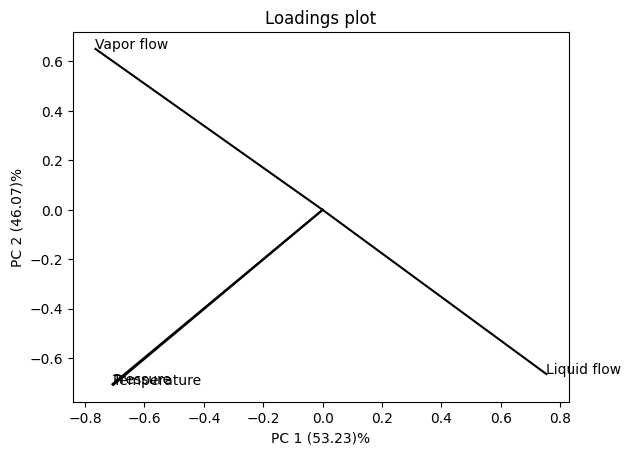

In [35]:
PCs = (0, 1)

# plot the loading points as lines starting from (0, 0)
for feat in range(pca.n_features_in_):
    plt.plot([0, loading_points[feat, PCs[0]]], [0, loading_points[feat, PCs[1]]], '-k')
    # annotate the feature name at the connected loading point
    plt.annotate(df.columns[feat], (loading_points[feat, PCs[0]], loading_points[feat, PCs[1]]))

plt.title('Loadings plot')
plt.xlabel(f'PC {PCs[0]+1} ({explained_variance[PCs[0]]*100:.2f})%')
plt.ylabel(f'PC {PCs[1]+1} ({explained_variance[PCs[1]]*100:.2f})%')

